## I. Importing The Require Library For Analysis

In [1]:
import numpy as np # for numerical computation

import pandas as pd # Wrangling data

import matplotlib.pyplot as plt # for visualization

# to plot chart inside the notebook
%matplotlib inline 

import seaborn as sns # for visualization
sns.set_style('darkgrid')

pd.set_option('display.max_rows', None)

Reading in the Dataset into a DataFrame data types

In [2]:

url='https://github.com/WalePhenomenon/climate_change/blob/master/fuel_ferc1.csv?raw=true'
fuel_data = pd.read_csv(url, error_bad_lines=False)

### Doing Data Quality Assesement

To perform data quality Assesemment,the steps are :
* Checking the data types
* checking for incompleteness i.e missing values ( nan and null values)
* perform  a summary statictis for the numerical and categorical features
* Checking for duplicate values in the data set

* Checking for consistency of the values in the dataset : Outliers

In [3]:
# Viewing the first 5 rows of the dataset
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [4]:
# viewing the last 5 rows
fuel_data.tail()


,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.03
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.95
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.99
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.11
29522,f1_fuel_2018_12_12_1_14,12,2018,wygen 3 bhp 52%,gas,mcf,17853.0,1.059,0.00,0.00,11.68


In [9]:
# Displaying the shape of the dataset
fuel_data.shape

(29523, 11)

There are 29523 observations and 11 features

In [10]:
# checking for the data types
fuel_data.dtypes

record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                 float64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object

 ## Checking for Missingness-

In [11]:
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
record_id                       29523 non-null object
utility_id_ferc1                29523 non-null int64
report_year                     29523 non-null int64
plant_name_ferc1                29523 non-null object
fuel_type_code_pudl             29523 non-null object
fuel_unit                       29343 non-null object
fuel_qty_burned                 29523 non-null float64
fuel_mmbtu_per_unit             29523 non-null float64
fuel_cost_per_unit_burned       29523 non-null float64
fuel_cost_per_unit_delivered    29523 non-null float64
fuel_cost_per_mmbtu             29523 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [12]:
fuel_data.isnull().sum()


record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

presence of a few missing data in the fuel unit.

In [13]:
# displaying the rows with missing value

fuel_data[fuel_data.isnull().any(axis=1)]

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
66,f1_fuel_1994_12_9_3_13,9,1994,mickleton,oil,NaN,3547.0,5.606160,41.930,41.770,7.48000
152,f1_fuel_1994_12_8_1_14,8,1994,ar nuclear one,nuclear,NaN,43461380.0,3.412600,1.654,0.000,0.48500
277,f1_fuel_1994_12_74_0_3,74,1994,perry k & w,other,NaN,2654942.0,0.100000,0.044,0.000,0.44000
626,f1_fuel_1994_12_117_0_1,117,1994,nine mile unit 1,nuclear,NaN,401216.0,0.127467,78.446,0.000,0.61500
627,f1_fuel_1994_12_117_0_4,117,1994,nine mile unit 2,nuclear,NaN,313736.0,0.119756,57.534,0.000,0.48000
829,f1_fuel_1994_12_189_0_1,189,1994,lake pauline,gas,NaN,41121.0,1.006000,2.400,2.400,2.38000
830,f1_fuel_1994_12_189_0_4,189,1994,fort phantom,gas,NaN,17436721.0,1.004051,2.420,2.420,2.41000
832,f1_fuel_1994_12_189_0_7,189,1994,rio pecos,gas,NaN,8488412.0,0.950000,1.720,1.720,1.81000
834,f1_fuel_1994_12_189_0_13,189,1994,paint creek,gas,NaN,3636694.0,0.993000,2.050,2.050,2.07000
835,f1_fuel_1994_12_189_1_1,189,1994,oak creek,gas,NaN,3349167.0,1.002000,2.060,2.060,2.06000


#### The above gives the understanding of how to deal and fill missing values in the dataset
for example, the column with the missing value is fuel_unit, from exploring the dataset each type of fuel have a particular unit of measurement that is predominant


This give us a correct way to fill missing values rather using mean of the fuel_unit, this will not be correct as wrong unit will be use for fuel types

* Dropping the rows with the missing values also will be a bad idea as information will be lost. Hence missing values should be treated with caution

* An interesting thing to note the row with the missing values have the fuel type of { coal, gas, nuclear, other and waste}, more so the the row having the fuel type 'other' tends to more of is  value declare missing, hence dropping this row might not be a bad idea

consulting the data owner will be good to know what other represent

More so -
* coal is measured more in ton(tonnes)
* gas is measured more in mcf(volume of 1000 of cubit feet cubic feet)
* oil is measured more in bbl(barrels)
* nuclear is measured more in gramsU

In [14]:
# a summary description of the numerical features in the dataset
fuel_data.describe()


,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [15]:
# Summary decriptions for the categorical variable
fuel_data.describe(include=['object'])

,record_id,plant_name_ferc1,fuel_type_code_pudl,fuel_unit
count,29523,29523,29523,29343
unique,29523,2315,6,9
top,f1_fuel_1997_12_68_2_10,big stone,gas,mcf
freq,1,156,11486,11354


Observation from the summary description of the categorical features:
* The fuel that was used the most is gas
* The plant that generate the most energy is Big stone
* energy was measured more in mcf which is the unit use to measure gas. shows that gas fuel was more used.

In [16]:
# displaying the fuel types use by plant to generate electricity
fuel_data.fuel_type_code_pudl.unique()

array(['coal', 'gas', 'nuclear', 'oil', 'waste', 'other'], dtype=object)

In [17]:
# The different unit for measuring  the fuel type
fuel_data.fuel_unit.unique()

array(['ton', 'mcf', 'kgU', 'bbl', 'gramsU', nan, 'mwdth', 'mmbtu',
       'mwhth', 'gal'], dtype=object)

### Examining the Distribution of data in the features:
* for Numeric features
* for Categorical features

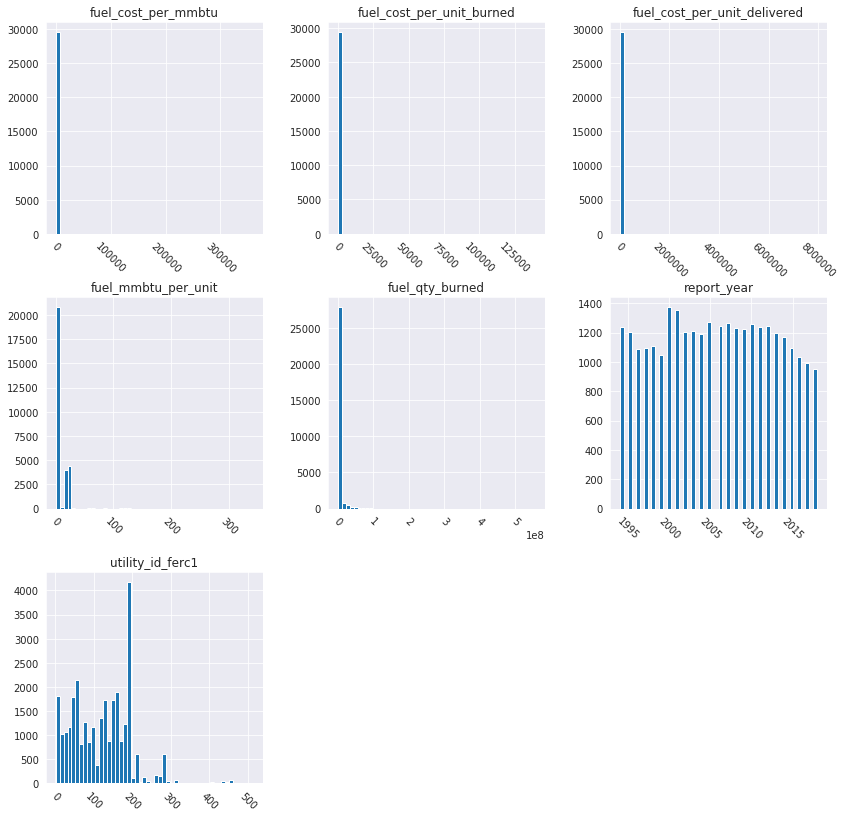

In [18]:
# for numeric features
fuel_data.hist(bins=50,figsize =(14,14), xrot=-45)
plt.show()

From the above plot, the values in the feature are not on the same scale, hence there is a need to normalize the data
this will be examine later.

### Examining the Distribution of the Categorical Features

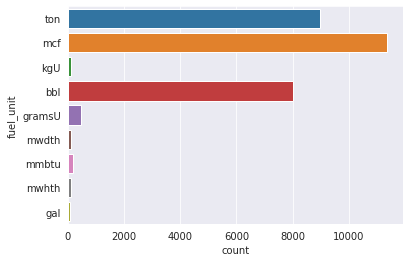

In [19]:
# for Categorical features
sns.countplot(y='fuel_unit', data=fuel_data)
plt.show()

The above plot shows that that fuel is measured  more in mcf which is the unit for gas follow by the fuel unit in ton which is the unit for coal, then there is bbl for the unit for oil. 

* There is also presence of sparse data in the fuel unit and this can affect the model:
* The fuel unit measurement like mwdth, mmbtu, mwhth gal, gramsU kgU- 
* we can deal with sparse data by checking if is less than 10% of the Data

Let examine the % distribution of the fuel unit


In [20]:
# Expressing the above plot in percentage
fuel_data['fuel_unit'].value_counts()/ fuel_data.shape[0]

mcf       0.384582
ton       0.303424
bbl       0.270907
gramsU    0.015717
mmbtu     0.006097
kgU       0.003726
mwhth     0.003387
mwdth     0.003218
gal       0.002845
Name: fuel_unit, dtype: float64

Expressing the above in percentage 
 * mcf 38%
 * ton 28%
 * Oil 27%
 * gramsU 1.7%
 the fuel unit left are minimal.

the sparse data can either be group to together or dropped
i will consider dropping the sparse data, since grouping them together still give a percentage less than 10%

This will be treated in data wrangling and cleaning

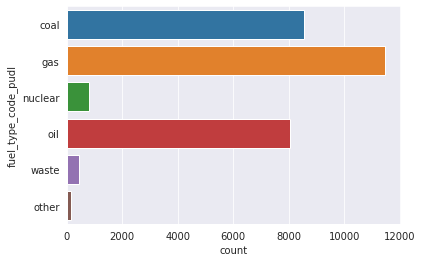

In [21]:
sns.countplot(y='fuel_type_code_pudl', data=fuel_data)
plt.show()

The about chart confirms the observation seen in the distribution
of fuel unit-
* This again shows that gas is used more used fuel follow by coal by and oil

## Let see this usage fuel type  in express in  percentage

In [22]:
# Expressing the above plot in percentage
fuel_data['fuel_type_code_pudl'].value_counts()/ fuel_data.shape[0]

gas        0.389053
coal       0.289503
oil        0.273143
nuclear    0.027707
waste      0.014938
other      0.005657
Name: fuel_type_code_pudl, dtype: float64

 Expressing the above in percentage 
 * Gas 38%
 * Coal 28%
 * Oil 27%
 the fuel type left are minimal

# Correlation-
-This is to Check for possible linear trends amongst features in the dataset for the numeric features.

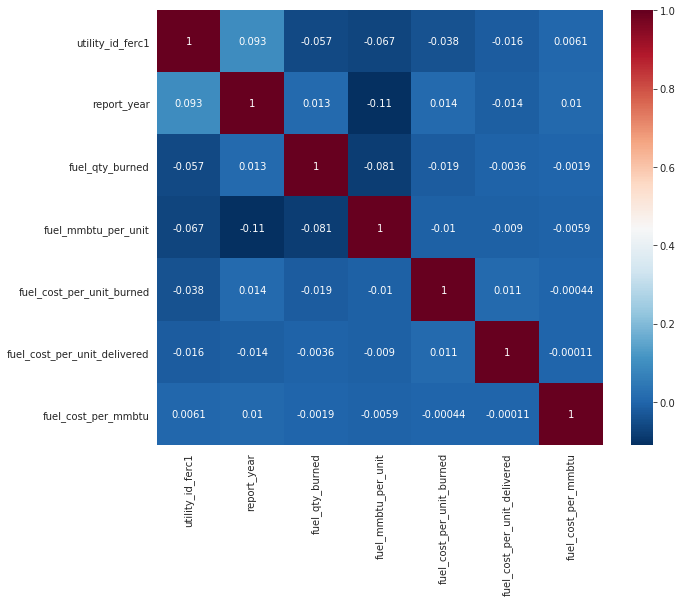

In [23]:
plt.figure(figsize=(10,8))
# Plot heatmap of annotated correlations
correlations = fuel_data.corr()
sns.heatmap(correlations,cmap='RdBu_r', annot=True)
plt.show()

There apppear to be no obvious or notable linear trend amongst the features looking at the correlations heatmap

# Segmentation Analysis
This entails checking the relationship between features this is achieved
* By performing Univarate analysis- checking the distribution of each variable
* By performing Bivarate analysis and multivariate analysis- this entails examing the 
relatioship between two or more features

The groupby and plot will come in handy

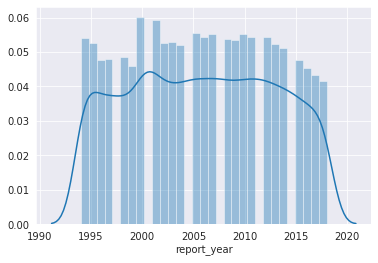

In [24]:
# checking the distributioin of the report year feature
sns.distplot(fuel_data.report_year)
plt.show()

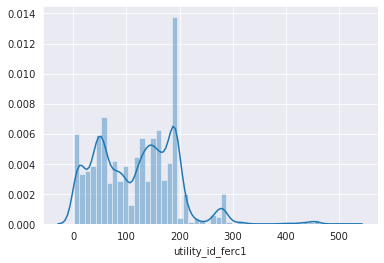

In [25]:
# checking the distribution of the utitility_id_ferc
sns.distplot(fuel_data.utility_id_ferc1)
plt.show()

### Examining the relationship between the utility id and the report year

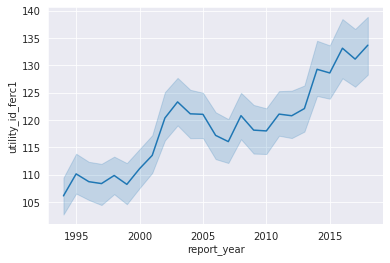

In [26]:
sns.lineplot(x='report_year', y='utility_id_ferc1', data=fuel_data)
plt.show()

* There appears to be an upward trends in the utility id as the year increase.
* could this trend indicate  a correlation between this two features?

### The Relationship between report year and the fuel quantity burned

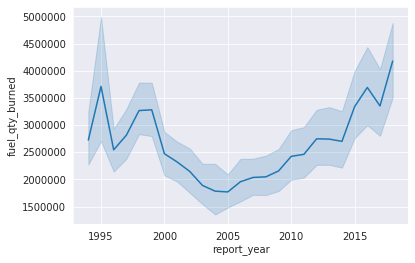

In [28]:
sns.lineplot(x='report_year', y='fuel_qty_burned', data=fuel_data)
plt.show()

Observation:
* around  the year 2005, appears to have the lowest quantity of fuel burned.
    and from  there onward, a slow progressive increase is seen and it kept increasing.
    
    
* curious Question to ask the owner of the data: what happen in 2005, why was there  a notable decrease in the quantity of fuel?

* the above give a feasibility of engineering a new feature : fuel quantity below 2005 and fuel quantity above 2005? i will try this this maybe it will be important to the model.

### Let check the following features against the report years
* fuel_mmbtu_per_unit
* fuel_cost_per_mmbtu
* fuel_cost_per_unit_delivered
* fuel_cost_per_unit_burned

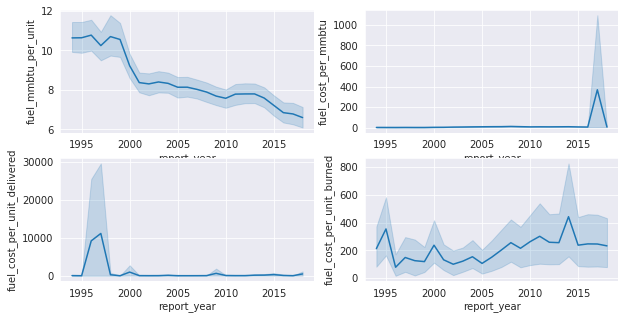

In [29]:
f, axes = plt.subplots(2, 2,figsize=(10,5))
sns.lineplot(  y="fuel_mmbtu_per_unit", x= "report_year", data=fuel_data,   ax=axes[0][0])
sns.lineplot(  y="fuel_cost_per_mmbtu", x= "report_year", data=fuel_data,  ax=axes[0][1])
sns.lineplot(y="fuel_cost_per_unit_delivered", x="report_year",data=fuel_data, ax=axes[1][0])
sns.lineplot(y="fuel_cost_per_unit_burned", x="report_year",data=fuel_data, ax=axes[1][1])
plt.show()



##### Observation:
* fuel_mmbtu_per_unit : a downward trends is seen as the years goes by
* fuel_cost_per_mmbtu : a sharp increase is seen from 2015 and a sudden decrease.
* fuel_cost_per_unit_delivered : from 1995, a progressive increase is seen the a notable continous decline afterwards
* fuel_cost_per_unit_burned : the trends look hapzard as the year increases

### Checking the Quantity of Fuel burnt and  the type of fuel that was burnt

In [30]:
# checking the quantity of fuel burnt and the type of fuel that was burnt
fuel_data[["fuel_type_code_pudl", "fuel_qty_burned"]].groupby(['fuel_type_code_pudl'], as_index=False).mean().sort_values(by='fuel_qty_burned', ascending=False)

,fuel_type_code_pudl,fuel_qty_burned
2,nuclear,5.454838e+06
1,gas,4.843183e+06
4,other,2.948137e+06
0,coal,1.903473e+06
5,waste,1.171914e+05
3,oil,6.311677e+04


##### Observation; 
* from the above the nuclear fuel has the highest number of quauntity burned on average, follow by gas.

### Examining the relationship between Fuel cost per unit burned and the fuel type

In [31]:
# relationship between fuel_cost_per_unit against report years
# checking the quantity of fuel burnt and the type of fuel that was burnt
fuel_data[["fuel_type_code_pudl", "fuel_cost_per_unit_burned"]].groupby(['fuel_type_code_pudl'], as_index=False).mean().sort_values(by='fuel_cost_per_unit_burned', ascending=False)

,fuel_type_code_pudl,fuel_cost_per_unit_burned
2,nuclear,4955.157002
3,oil,168.877086
0,coal,67.421830
5,waste,19.518122
4,other,18.253856
1,gas,13.659397


fron the above by checking the fuel type and the cost of fuel burned per unit- 
* Nuclear fuel appears to have the highest cost per fuel burned, followed by oil, with gas been the least.

### Checking the relationship between cost of fuel unit that is deliver by the plant  and the fuel unit
* the fuel that are measured in kgU and gramsU appears to have the highest cost per unit delivered
and from the previous it can be that nuclear fuel is seen to be more measure in kgU and gramsU,


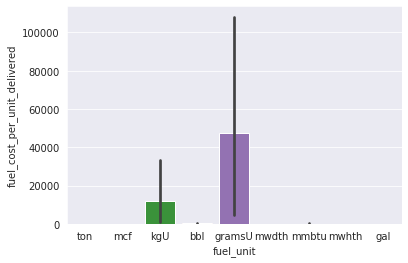

In [32]:

sns.barplot( "fuel_unit", "fuel_cost_per_unit_delivered", data=fuel_data);



Let check this observatioin against the fuel type that is use below

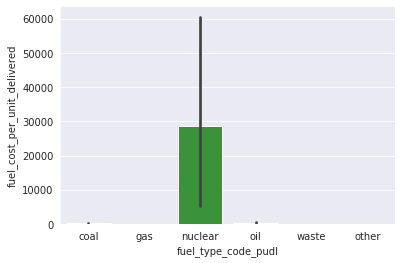

In [33]:
sns.barplot( "fuel_type_code_pudl", "fuel_cost_per_unit_delivered", data=fuel_data);



* nuclear fuel emerges, thus this is right with the observation above.
* moreso the the cost of fuel deliver per unit  by the nuclear fuel is enormous compare with other fuel types, let see the mean of this cost:

### Examining the relationship between Fuel cost per unit delivered and the fuel type



In [34]:
fuel_data[["fuel_type_code_pudl", "fuel_cost_per_unit_delivered"]].groupby(['fuel_type_code_pudl'], as_index=False).mean().sort_values(by='fuel_cost_per_unit_delivered', ascending=False)

,fuel_type_code_pudl,fuel_cost_per_unit_delivered
2,nuclear,28616.915039
3,oil,313.907691
0,coal,116.951141
5,waste,18.413052
4,other,16.871485
1,gas,12.095172


## Dealing With Missing Values:
* Filling the missing values for the unit column using the fuel_type_code_pudl columns

Checking the row  with the fuel type of 'other' values in the dataset.
* let understand fuel type with other in the dataset.

In [35]:
fuel_type_other = fuel_data[fuel_data.fuel_type_code_pudl == 'other']
fuel_type_other

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
84,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,other,bbl,55652.0,0.149719,14.685,15.090,2.335
203,f1_fuel_1994_12_54_0_6,54,1994,w.f. wyman unit 4,other,bbl,1217.0,0.149719,14.685,15.090,2.335
228,f1_fuel_1994_12_61_0_9,61,1994,wyman,other,bbl,7639.0,0.149719,14.685,15.090,2.335
277,f1_fuel_1994_12_74_0_3,74,1994,perry k & w,other,NaN,2654942.0,0.100000,0.044,0.000,0.440
349,f1_fuel_1994_12_99_0_1,99,1994,eaton,other,bbl,75.0,0.139136,0.530,0.000,3.830
356,f1_fuel_1994_12_99_1_1,99,1994,daniel,other,bbl,4442.0,0.138452,0.510,0.000,3.700
358,f1_fuel_1994_12_99_1_4,99,1994,greene co.,other,bbl,2473.0,0.138032,0.530,0.000,3.870
554,f1_fuel_1994_12_132_0_6,132,1994,big stone,other,ton,19361.0,0.013535,18.980,18.980,0.701
721,f1_fuel_1994_12_166_1_4,166,1994,celanese ii,other,mcf,1008762.0,0.001000,2.608,2.608,2.608
840,f1_fuel_1994_12_89_0_3,89,1994,blount station,other,ton,4253.0,0.008756,20.110,20.110,1.150


Observation:
* The values in fuel type other, those with the missing values tend to have high amount of fuel quantity burned
* could they be outliers?
* the data in  the other fuel only constitute of 0.3% of the dataset, however is contains high number of missing values and outlier- and this it will be safe to drop rows with the other fuel type .

* however the datas with 'other' fuel type should not be dropped as it can contains sensitive and important data, which will be crucial  to the  model.





* misssing value should be can imputed using the mode of the fuel_type_code_pudl eg-
    * coal map to ton
    * gas map to mcf
    * nuclear map to kgU
    * oil map to bbl
    * waste map to ton
    * drop other
    
 * we can also delete the rows observatioin the features that is missing, if the observation is small and from our dataset only 180 observation of the fuel unit feature are missing- they be as well as be dropped
 
 * Another thing to try is to inform the algorithm that those values are actually missing by flagging the rows with missing values.
 
 
 in my subsequent analysis i will work with all these all this step to find the best one that will produce the highest accuracy and model the dataset well
 
##### However for this analysis i will fill the missing values using the fuel type code pudl while for the 'other' fuel type i will flag the missing  value for the algorithm to know that the values are missing. this will be dealt with in the data cleaning section
    


# Checking for Outlier :
This entails checking the dataset for spurious or ridiculous entry
This will do for the numeric features

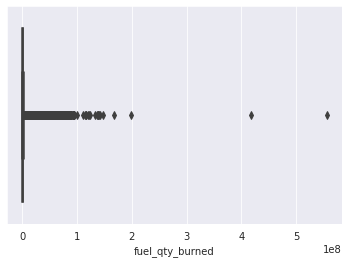

In [36]:
# checking for outlier in the fuel qauntity burned
sns.boxplot(fuel_data.fuel_qty_burned)

There appears to be presence of outlier in the above feature i.e some values in the data that is out of line
let check same for other numeric feature

The violinplot above confirms the presence of outliers 

In [37]:
# let define a function to help with plotting mutiple plot together
# This is a function to plot multiple subplots
# to check for the presence of outliers
# the function plot multiple box plot of the numerical features

def multiple_plot(list_feature, total_cols):

   
    num_plots = len(list_feature)
  

    total_rows = num_plots//total_cols 

    fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(3*total_cols, 3*total_rows), constrained_layout=True)
    
    for i, var in enumerate(list_feature):
        row = i//total_cols
        pos = i % total_cols 
    
        plot = sns.boxplot(x=var, data=fuel_data, ax=axs[row][pos])

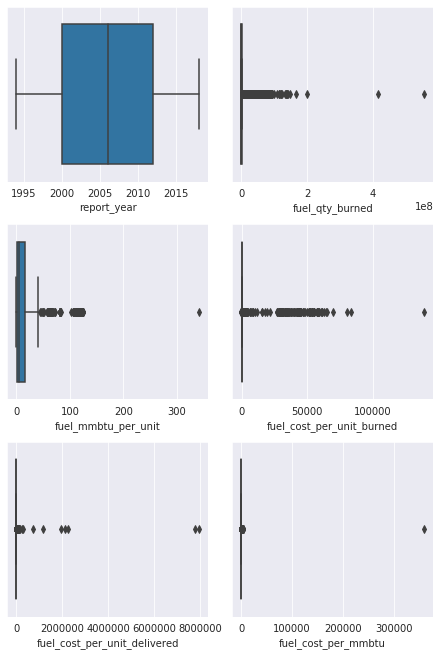

In [38]:
#list_feature = ['fuel_qty_burned', 'fuel_cost_per_unit_burned', 'fuel_cost_per_unit_delivered', 'report_year','']
list_feature = ['report_year', 'fuel_qty_burned', 'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned', 'fuel_cost_per_unit_delivered','fuel_cost_per_mmbtu']
total_cols = 2
multiple_plot(list_feature,  total_cols)

The above plot shows that there is presence of outlier in the features above, except the report_year,.
* The outlier could be due to the rows with 'other'  values.
* Dropping them could solve the outlier in the feature above

# Data Cleaning

#### 1. Checking for duplicates rows in the dataset

#### 2. Filling the Missing Values in the Dataset
* The missing values are fill using the fuel type code pudl and the fuel unit
* The 'other' fuel type values with missing values will be drop, since it values is close to zero

#### 3. Dealing with the sparse data : data that can cause noise to the model
* my approach : i consider dropping the sparse data in the fuel unit since they are almost zero

#### 4. Dealing with Outliers : data  that can cause the model to overfit

In [39]:
# checking for duplicate rows
fuel_data.duplicated().any()

False

In [40]:
# filling the missing values in fuel unit using the fuel type code pudl features and mapping it 
# to the mode of the measurement of each fuel unit
fuel_data['fuel_unit'] = fuel_data['fuel_unit'].fillna(fuel_data['fuel_type_code_pudl'].map({'coal':'ton', 'gas':'mcf', 'nuclear':'gramsU', 'oil':'bbl', 'waste':'ton'}))

In [41]:
# Checking for missing values
fuel_data.isnull().sum()

record_id                        0
utility_id_ferc1                 0
report_year                      0
plant_name_ferc1                 0
fuel_type_code_pudl              0
fuel_unit                       36
fuel_qty_burned                  0
fuel_mmbtu_per_unit              0
fuel_cost_per_unit_burned        0
fuel_cost_per_unit_delivered     0
fuel_cost_per_mmbtu              0
dtype: int64

There appears a few missing values, let check the rows that is missing-


In [42]:
# dropping row with other fuel type since is has the  nan
fuel_data = fuel_data[fuel_data['fuel_type_code_pudl'] != 'other']


In [43]:
# Checking for missing values
fuel_data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [44]:
fuel_data.fuel_unit.unique()

array(['ton', 'mcf', 'kgU', 'bbl', 'gramsU', 'mwdth', 'mmbtu', 'mwhth',
       'gal'], dtype=object)

#####  the missing values has been dealt, there is no more presence of missing values in the dataset

### Dealing with sparse data in the fuel_unit
* we will group all the sparse data and drop/delete them from the dataset

In [45]:
fuel_data.fuel_unit.replace(['mwhth','gal','mmbtu','mwdth','kgU'], 'sparse', inplace=True)

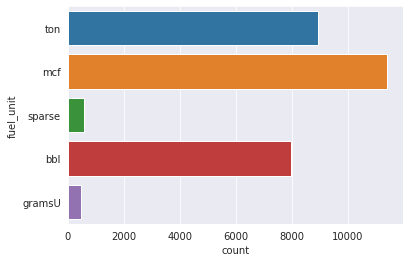

In [46]:
# let plot and the fuel_unit plot again
# to see if the changes we just made has been done

sns.countplot(y='fuel_unit', data=fuel_data)
plt.show()

let go ahead and drop the sparse row from our dataset

In [47]:
# Removing the sparse data from the dataset
fuel_data = fuel_data[fuel_data['fuel_unit'] != 'sparse']


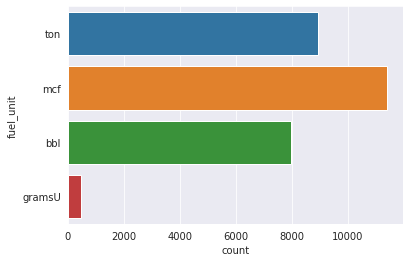

In [48]:
# let see the plot of the fuel unit to again
sns.countplot(y='fuel_unit', data=fuel_data)
plt.show()

### The dataset is now free of spare class and missing values, let's now cure the dataset of  outliers

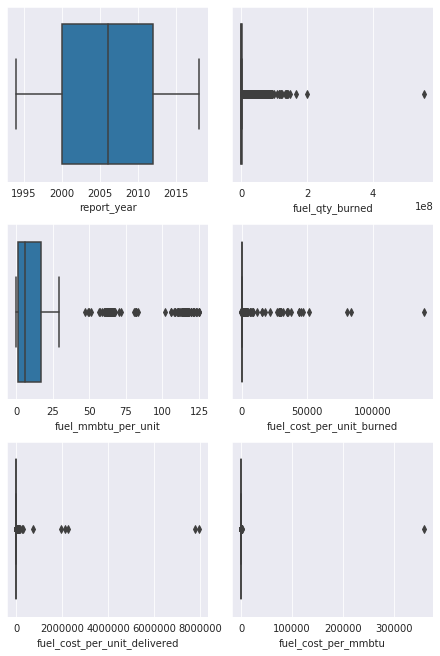

In [49]:
# plotting box plot to check for outliers
#list_feature = ['fuel_qty_burned', 'fuel_cost_per_unit_burned', 'fuel_cost_per_unit_delivered', 'report_year','']
list_feature = ['report_year', 'fuel_qty_burned', 'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned', 'fuel_cost_per_unit_delivered','fuel_cost_per_mmbtu']
total_cols = 2
multiple_plot(list_feature,  total_cols)

* from the boxplot above, fue_qty_burned, fuel_cost_per_mmbtu,fuel_cost_per_unit_delivered,fuel_mmbtu_per_unit has potential outlier.



* let's look at the largest 5 of each features just confirm the presence of outliers

In [50]:
# checking the 5 largest values fuel_qty_burned
fuel_data.fuel_qty_burned.sort_values(ascending=False).head(5)

1715     555894250.0
12855    198577395.0
22624    166385450.0
24102    147837343.0
27258    142140958.0
Name: fuel_qty_burned, dtype: float64

from the above the value jump from 198577395 to a large value of 
555894250- that is quite large

it is safe to consult the data source, wether the value is justificable or was a
mistake

In [51]:
# checking the 5 largest values fuel_cost_per_unit_delivered
fuel_data.fuel_cost_per_unit_delivered.sort_values(ascending=False).head(5)

3564    7964521.0
3244    7793482.0
3565    2255688.0
3245    2114508.0
3566    1942979.0
Name: fuel_cost_per_unit_delivered, dtype: float64

In [52]:
# checking the 5 largest values fuel_cost_unit_per_burned
fuel_data.fuel_cost_per_unit_burned.sort_values(ascending=False).head(5)

25127    139358.0
20719     83538.0
24577     80459.0
6834      51698.0
8105      47025.0
Name: fuel_cost_per_unit_burned, dtype: float64

In [53]:
# checking the 5 largest values fuel_mmbtu_per_unit
fuel_data.fuel_mmbtu_per_unit.sort_values(ascending=False).head(5)

2497    125.120000
1046    124.860000
1112    124.855946
1043    123.890000
1277    123.040000
Name: fuel_mmbtu_per_unit, dtype: float64

In [54]:
# checking the 5 largest values fuel_cost_per_mmbtu
fuel_data.fuel_cost_per_mmbtu.sort_values(ascending=False).head(5)

28256    359278.000
2373        605.294
779         443.336
27411       391.722
26423       351.058
Name: fuel_cost_per_mmbtu, dtype: float64

* the value of in the fuel_cost_per_mmbtu, jump from 605,294 to 359278- wow this is a very big leap- thus an outlier indeed

### The analysis will stop here, in the subsequent notebook, we will deal with the outliers that we have already observed and identify.

I stongly welcome critism though constructive and how i can improve on the exploratory analysis

thanks Hamoye ai labs

# In conclusion
* Exploring the dataset : the fuel unit of measurement is not consistent.
* it is seen that a particular fuel type have different forms of measurement and this is due to the plant_name taking this measurement 
    
    
    * eg 
    from the nuclear is measured using this 4 different unit - gramsU,mwdth,mwhth,mmbtu,kgU
    gas - mcf,mmbtu,mwhth,kGu,mmdth
    coal - ton,mmbtu
    
### Thus, fuel_gty_burned measurement for the fuel types will not be consistent throughout since different measurement was and there is no standard measurement used , as a result this feature cause the model to give spurious result



* A better feature will be the fuel_mmbtu_per_unit, fuel_cost_per_mmbtu since all the measurement of the fuel
types are converted to the same unit of measurement and definitely will be on the same scale of measurement, hence these will be good features for the model




* the features, fuel_cost_per_unit_delivered an fuel_cost_per_unit_burned, fuel_qty_burned should be converted 
to same level of unit for the fuels types, if we are going to use them to build our model else, they will cause
the model to give a spurious result

    

In [55]:
# saving the almost_clean dataset to a csv for further cleaning.
fuel_data.to_csv('almost_clean_df.csv', index=None)